--- Data Head ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Data Shape ---
(768, 9)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies       

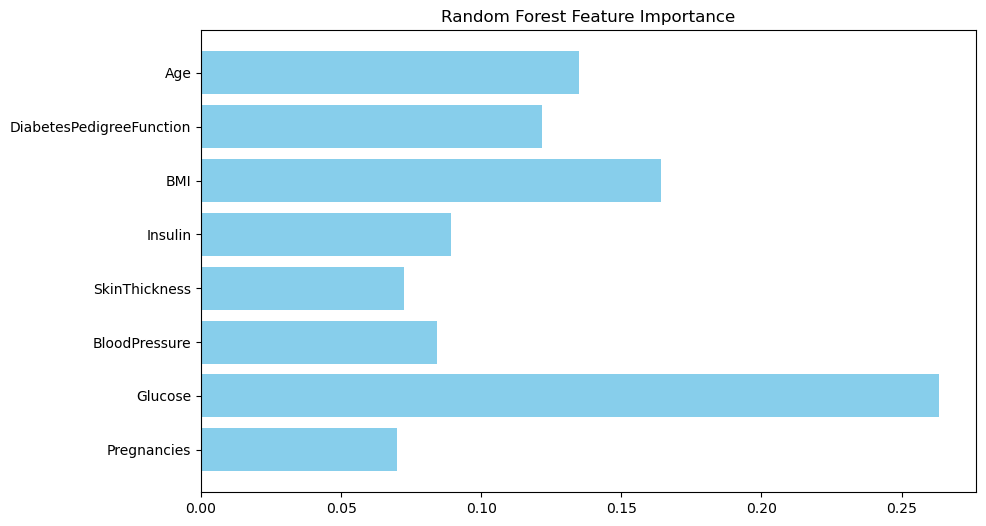


GRADIENT BOOSTING CLASSIFIER
Accuracy score of Training data is: 0.9267100977198697
Accuracy score of Test data is: 0.7597402597402597


==Enhanced Evaluation For Gradient Boosting CLassifer==


--- Raw Confusion Matrix ---
[[79 20]
 [17 38]]

Interpretation of Matrix:
[[True Negatives, False Positives]
 [False Negatives, True Positives]]



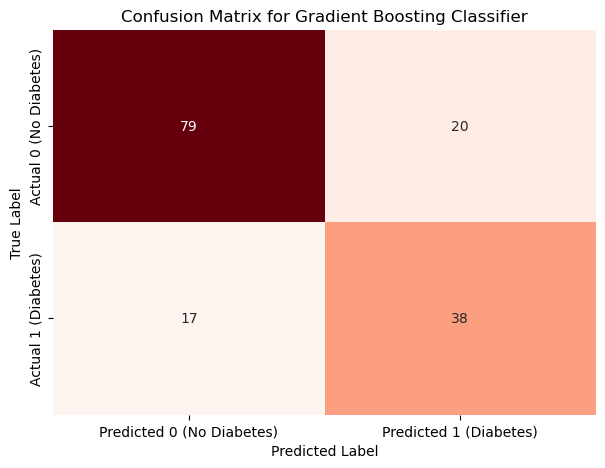


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


--- GBC Feature Importances ---
{'Pregnancies': np.float64(0.02684764801508186), 'Glucose': np.float64(0.3844970264803902), 'BloodPressure': np.float64(0.02890474189858199), 'SkinThickness': np.float64(0.03164081168142423), 'Insulin': np.float64(0.07568705195730986), 'BMI': np.float64(0.18559019681506586), 'DiabetesPedigreeFunction': np.float64(0.10618915805896147), 'Age': np.float64(0.1606433650931847)}


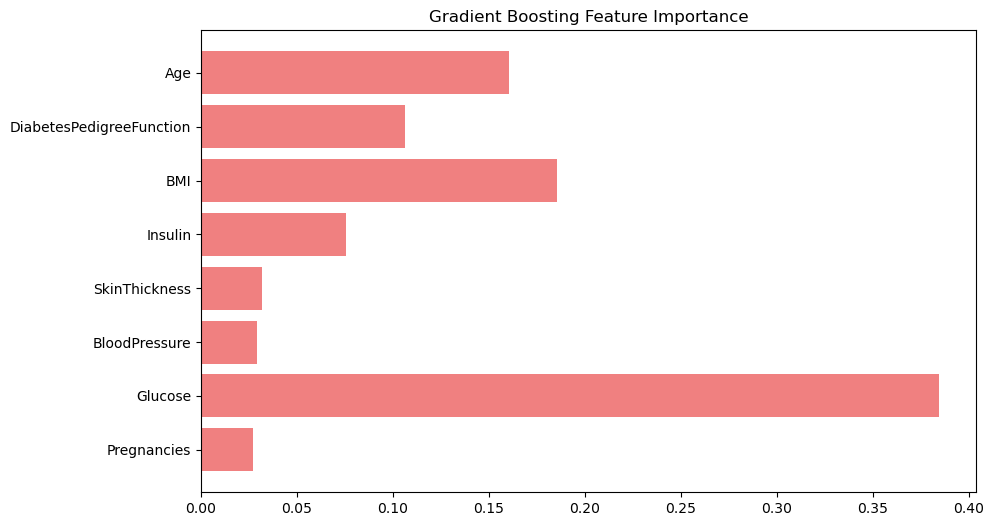


SUPPORT VECTOR MACHINES Model
Accuracy score of Training data is: 0.8289902280130294
Accuracy score of Test data is: 0.7467532467532467


In [1]:
# 1. Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


# 2. Reading the data
df = pd.read_csv(r'C:\Users\KIIT0001\Downloads\diabetes.csv')
print("--- Data Head ---")
print(df.head())

# 3. EDA Of Data (Shape, Info, Describe, Missing Values)
print("\n--- Data Shape ---")
print(df.shape)
print("\n--- Data Info ---")
df.info()
print("\n--- Data Describe (Zeros visible in min rows) ---")
# df.describe() showed 0s for Glucose, BloodPressure, SkinThickness, Insulin, and BMI.
print(df.describe())
print("\n--- Missing values (NaN check) ---")
print(df.isna().sum())


# 4. Data Cleaning / Handling Zeros (Imputation)
# Columns where 0 is biologically impossible and should be treated as missing
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with the median of the non-zero values for each column
print("\n--- Imputing Zero Values with Median ---")
for col in zero_cols:
    df[col].replace(0, df[col][df[col] != 0].median(), inplace=True)

# Verify the changes (min should now be non-zero for these columns)
print(df[zero_cols].describe().loc['min'])


# 5. Feature and Label Separation
X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


# 7. Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

feature_names = X.columns


# --------------------------------------------------
# RANDOM FOREST CLASSIFIER (RFC)
# --------------------------------------------------
print("\n" + "="*60)
print("RANDOM FOREST CLASSIFIER")
print("="*60)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Calculate scores
score_train_rf = forest.score(X_train, y_train)
score_test_rf = forest.score(X_test, y_test)

print(f"Accuracy score of Training data is: {score_train_rf}")
print(f"Accuracy score of Test data is: {score_test_rf}")

# Feature Importance
forest_feature_importances = forest.feature_importances_
print("\n--- Random Forest Feature Importances ---")
print(dict(zip(feature_names, forest_feature_importances)))

plt.figure(figsize=(10, 6))
plt.barh(feature_names, forest_feature_importances, color='skyblue')
plt.title('Random Forest Feature Importance')
plt.show()


# --------------------------------------------------
# GRADIENT BOOSTING CLASSIFIER (GBC)
# --------------------------------------------------
print("\n" + "="*60)
print("GRADIENT BOOSTING CLASSIFIER")
print("="*60)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Calculate scores (from your original notebook)
score_train_gbc = gbc.score(X_train, y_train)
score_test_gbc = gbc.score(X_test, y_test)

print(f"Accuracy score of Training data is: {score_train_gbc}")
print(f"Accuracy score of Test data is: {score_test_gbc}")


# ##################################################################
#  NEW ENHANCED EVALUATION SECTION FOR GBC (Your Request) 
# ##################################################################
print("\n" + "#"*60)
print("### ENHANCED EVALUATION FOR GRADIENT BOOSTING CLASSIFIER ##")
print("#"*60)

# Get predictions for the test set
y_pred_gbc = gbc.predict(X_test)

# Generate and print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)

print("\n--- Raw Confusion Matrix ---")
print(cm)
print("\nInterpretation of Matrix:\n[[True Negatives, False Positives]\n [False Negatives, True Positives]]\n")

# Plot the Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'],
            yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show() # 
# Generate and print the Classification Report (Precision, Recall, F1-Score)
print("\n" + "="*60)
print("--- Classification Report ---")
print("="*60)
print(classification_report(y_test, y_pred_gbc))

# Feature Importance (from your original notebook)
gradf = gbc.feature_importances_
print("\n--- GBC Feature Importances ---")
print(dict(zip(feature_names, gradf)))

plt.figure(figsize=(10, 6))
plt.barh(feature_names, gradf, color='lightcoral')
plt.title('Gradient Boosting Feature Importance')
plt.show()


# --------------------------------------------------
# SUPPORT VECTOR MACHINES MODEL (SVC)
# --------------------------------------------------
print("\n" + "="*60)
print("SUPPORT VECTOR MACHINES MODEL")
print("="*60)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Calculate scores (from your original notebook)
score_train_svm = svm.score(X_train, y_train)
score_test_svm = svm.score(X_test, y_test)

print(f"Accuracy score of Training data is: {score_train_svm}")
print(f"Accuracy score of Test data is: {score_test_svm}")